**K-means** **Clustering**

In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [35]:
# Load the dataset
df = pd.read_csv("/content/medical_cost.csv")

# Display basic dataset information
print("Dataset Head:\n", df.head())

Dataset Head:
    Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520


In [36]:
# Data Preprocessing: Encode categorical variables (sex, smoker, region)
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

# Encoding categorical features
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [37]:
# Select relevant features for clustering
features = ['age', 'bmi', 'children', 'smoker', 'region']
X = df[features]

# Standardizing the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Elbow Method to Determine Optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
print(kmeans)

KMeans(n_clusters=10, n_init=10, random_state=42)


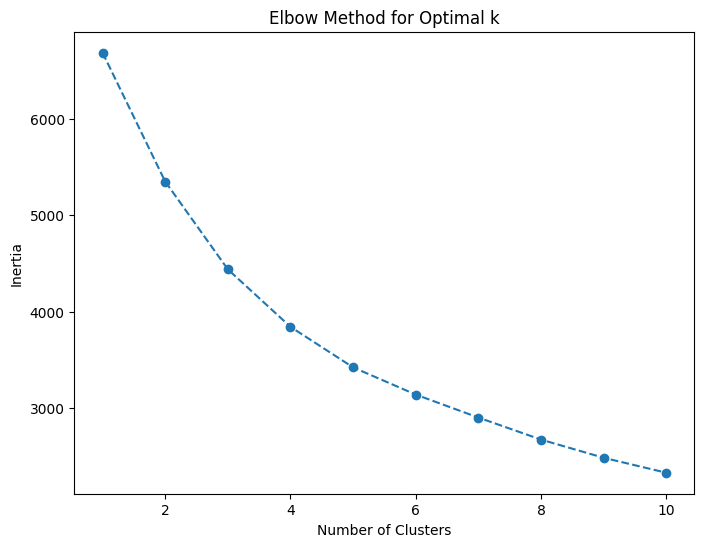

In [39]:

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [40]:
# After reviewing the elbow plot, choosing k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


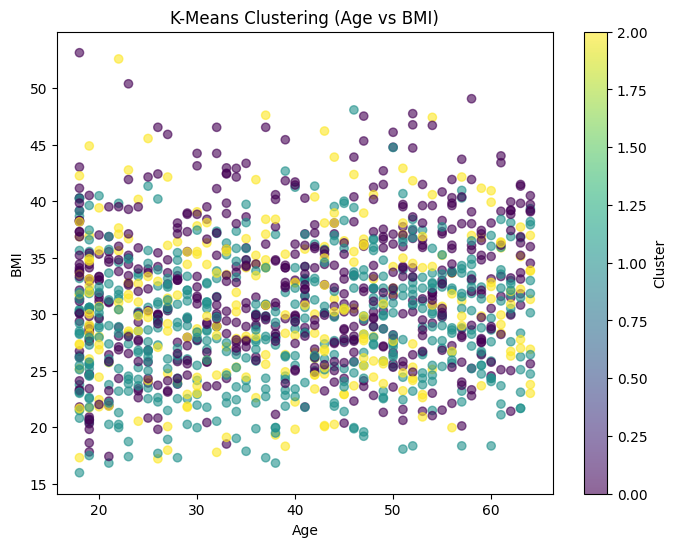

In [41]:
# Visualize the clusters using 'age' and 'bmi'
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['bmi'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("K-Means Clustering (Age vs BMI)")
plt.colorbar(label="Cluster")
plt.show()

**Agglomerative** **CLustering**

In [42]:
# Convert to PyTorch tensor for Agglomerative clustering
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Compute the linkage matrix
linkage_matrix = sch.linkage(X_tensor, method='ward')

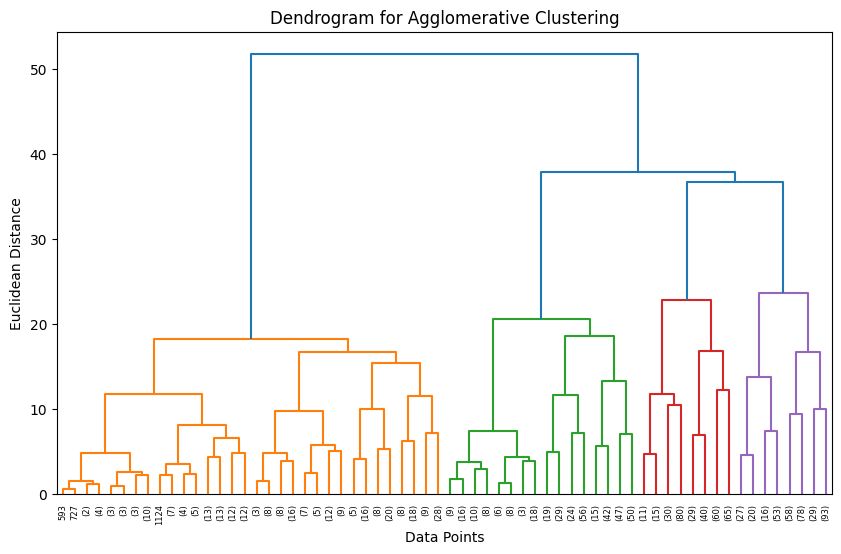

In [43]:
# Plotting the Dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [45]:
# Apply Agglomerative Clustering with k = 3 (based on dendrogram)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Agglo_Cluster'] = agg_clustering.fit_predict(X_scaled)


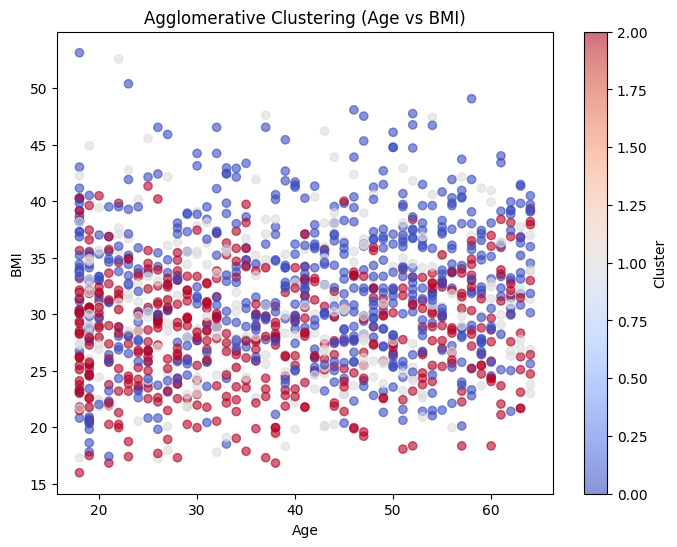

In [46]:
# Visualize Agglomerative Clustering using 'age' and 'bmi'
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['bmi'], c=df['Agglo_Cluster'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Agglomerative Clustering (Age vs BMI)")
plt.colorbar(label="Cluster")
plt.show()

In [47]:
# Display some of the resulting clusters
df[['age', 'bmi', 'children', 'smoker', 'region', 'KMeans_Cluster', 'Agglo_Cluster']].head()

,age,bmi,children,smoker,region,KMeans_Cluster,Agglo_Cluster
0,19,27.900,0,1,3,2,1
1,18,33.770,1,0,2,0,0
2,28,33.000,3,0,2,0,0
3,33,22.705,0,0,1,1,2
4,32,28.880,0,0,1,1,2
